# 本project目標

1. 定義 Label
 * 1. Only use CBI1, CBI2, HADS_A, HADAS_B
 * 2. Define for high and low  
    ```
    High Score: 
      CBI >= 16
      HADS >= 8
    ```
2. EDA/ plot

3. feature selection (extraction 已做好) + Classfied + Plot margin and confussion matrix



In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# dataprocess

In [3]:
df_feature = pd.read_excel("Features.xlsx")
df_feature
# # dropna 補齊excel格式跑掉
df_feature_cl = df_feature.dropna()
df_feature_cl = df_feature_cl.rename(columns=  {'Unnamed: 0':'Name'})
df_feature_cl =  df_feature_cl.set_index('Name')
df_feature_cl.head()

,CH1_Oxy_Task_begin_slope,CH1_Deoxy_Task_begin_slope,CH2_Oxy_Task_begin_slope,CH2_Deoxy_Task_begin_slope,CH3_Oxy_Task_begin_slope,CH3_Deoxy_Task_begin_slope,CH1_Oxy_Recovery_begin_slope,CH1_Deoxy_Recovery_begin_slope,CH2_Oxy_Recovery_begin_slope,CH2_Deoxy_Recovery_begin_slope,...,CH2_Oxy_Task_auc,CH2_Deoxy_Task_auc,CH3_Oxy_Task_auc,CH3_Deoxy_Task_auc,CH1_Oxy_recovery_auc,CH1_Deoxy_recovery_auc,CH2_Oxy_recovery_auc,CH2_Deoxy_recovery_auc,CH3_Oxy_recovery_auc,CH3_Deoxy_recovery_auc
Name,,,,,,,,,,,,,,,,,,,,,
Aak,0.024819,-0.013657,0.011554,-0.009824,0.012998,-0.020968,0.022015,-0.047618,0.057992,0.007034,...,24.697008,7.841043,28.690798,8.986307,42.479873,27.319602,45.187172,40.581406,38.931958,40.268678
Amiya,0.035790,-0.035772,-0.006235,0.020678,0.020728,0.019056,-0.031904,0.031897,-0.026799,-0.047282,...,25.092159,43.540751,40.474339,32.826763,16.732717,53.206043,37.746735,20.726629,25.285574,19.758183
April,0.019041,-0.044347,-0.012907,-0.014942,0.014461,-0.013636,-0.008208,0.014011,-0.010022,-0.009350,...,41.735822,35.805988,40.129903,29.712021,48.940332,20.251212,24.393253,21.443065,35.942811,9.212714
Archetto,0.016882,-0.028790,0.011429,-0.035307,0.004710,-0.004605,-0.031117,0.006936,-0.045191,-0.013461,...,38.966250,18.055291,40.556234,53.948192,28.317373,26.770196,17.789030,18.595471,29.037015,60.142187
Ash,0.068736,0.065589,0.057870,-0.034063,0.048478,-0.021619,0.010310,0.006476,0.007697,0.004553,...,37.383177,36.930905,45.768849,11.007298,54.844055,56.742961,53.634961,36.871146,52.210077,47.997299


In [4]:
# 確認乾淨
print("Feature DataFrame Shape: ", df_feature_cl.shape)
print("\n\nNull Value:\n", df_feature_cl.isna().sum())

Feature DataFrame Shape:  (37, 132)


Null Value:
 CH1_Oxy_Task_begin_slope      0
CH1_Deoxy_Task_begin_slope    0
CH2_Oxy_Task_begin_slope      0
CH2_Deoxy_Task_begin_slope    0
CH3_Oxy_Task_begin_slope      0
                             ..
CH1_Deoxy_recovery_auc        0
CH2_Oxy_recovery_auc          0
CH2_Deoxy_recovery_auc        0
CH3_Oxy_recovery_auc          0
CH3_Deoxy_recovery_auc        0
Length: 132, dtype: int64


In [5]:
# 讀label
df_label = pd.read_excel("label.xlsx")
df_label = df_label.T

# 把第一水平行放到columns
df_label.columns = df_label.iloc[0]
df_label = df_label.iloc[1:]

# 移除CBI_3、CBI_4
df_label = df_label.drop(columns= ['CBI_3', 'CBI_4'])
print(df_label.shape)
df_label.head()

(39, 8)


Name,CBI_1,CBI_2,A score,D score,Gender,Age,Seniority,Educate
Carnelian,14.0,15.0,8.0,6.0,0.0,35.0,12.0,4.0
Kal'tsit,19,22,1,0,0,33,12,5
Skadi-the-Corrupting-Heart,21,25,3,8,1,34,13,4
Gladiia,12,16,10,4,0,36,15,5
Ash,15,15,8,10,1,42,15,4


In [6]:
# apply用的function
def change(x):
    if x >= 16:
        return 1
    else:
        return 0

def change_hade(x):
    if x >= 8:
        return 1
    else:
        return 0       

# 處理CBI1跟CBI2
change_list = ["CBI_1", "CBI_2"]
for col in change_list:
    df_label[col + "_label"] = df_label[col].apply(change)
    df_label.drop(columns= col, inplace= True)

# 處理A_score跟D_score
change_list2 = ["A score", "D score"]
for col in change_list2:
    df_label[col + "_label"] = df_label[col].apply(change_hade)
    df_label.drop(columns= col, inplace= True)

df_label.head()

Name,Gender,Age,Seniority,Educate,CBI_1_label,CBI_2_label,A score_label,D score_label
Carnelian,0.0,35.0,12.0,4.0,0,0,1,0
Kal'tsit,0,33,12,5,1,1,0,0
Skadi-the-Corrupting-Heart,1,34,13,4,1,1,0,1
Gladiia,0,36,15,5,0,1,1,0
Ash,1,42,15,4,0,0,1,1


# boxplot - 高低分對年紀的比較


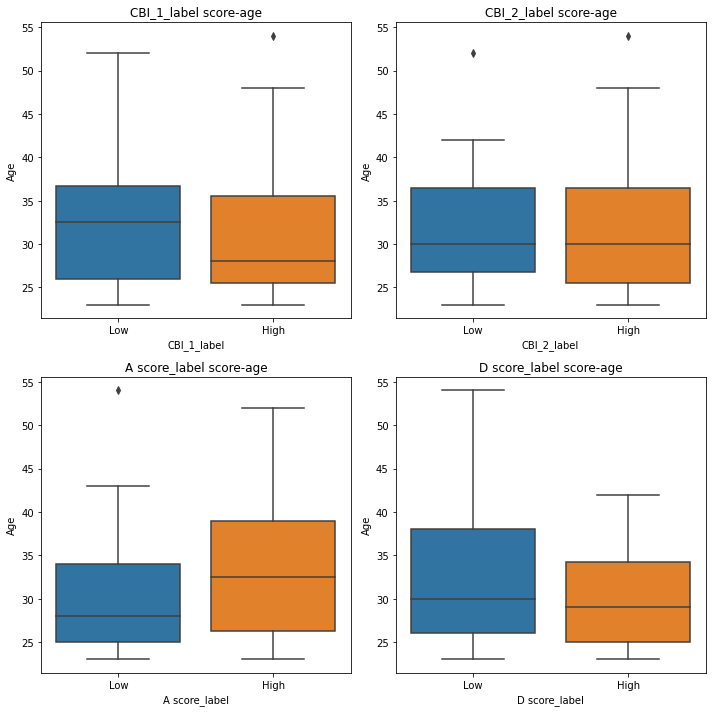

In [7]:
# boxplot
plt.figure(figsize= (10, 10))
for i, col_p in enumerate(["CBI_1_label", "CBI_2_label", "A score_label", "D score_label"]):
    plt.subplot(2, 2, i+1)
    # sns.set_theme(style="whitegrid")
    sns.boxplot(x= col_p, y='Age', data= df_label)
    plt.title(col_p + " score-age")
    plt.xticks([0, 1], ['Low', 'High'])
    plt.tight_layout()
    
plt.show()

# countplot - 高低分對性別的比較

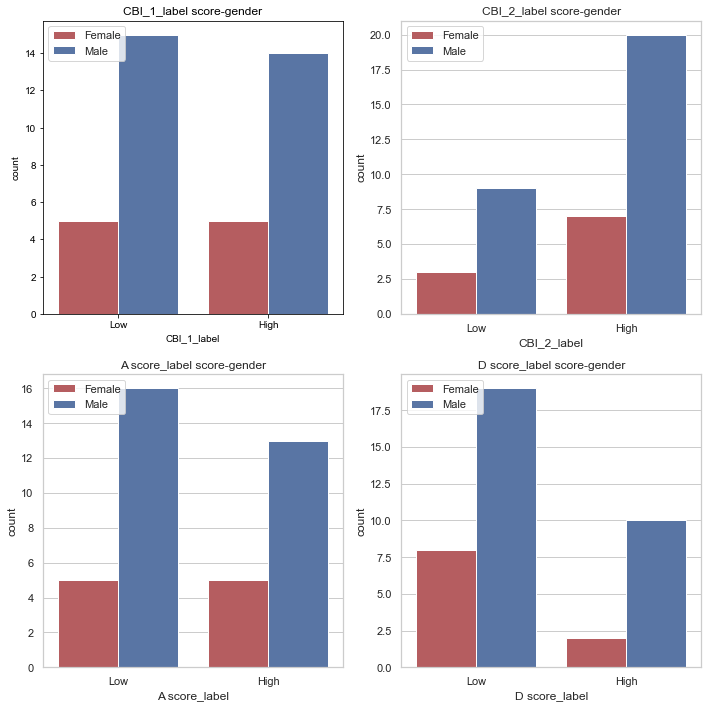

In [8]:
plt.figure(figsize= (10, 10))

for i, col_p in enumerate(["CBI_1_label", "CBI_2_label", "A score_label", "D score_label"]):
    plt.subplot(2, 2, i+1)
    sns.set_theme(style="whitegrid")
    sns.countplot(x= col_p, data= df_label, hue= 'Gender', palette= ['r', 'b'])
    plt.title(col_p + " score-gender")
    plt.xticks([0, 1], ['Low', 'High'])
    plt.legend(loc='upper left', labels=['Female', 'Male'])
    plt.tight_layout()

plt.show()

## 重要!! - inner join

In [9]:
# merge ，用 inner ，人名一樣的才會上
dfs = pd.merge(df_feature_cl, df_label, left_index= True, right_index= True)
print(dfs.shape)
dfs.head()

(37, 140)


,CH1_Oxy_Task_begin_slope,CH1_Deoxy_Task_begin_slope,CH2_Oxy_Task_begin_slope,CH2_Deoxy_Task_begin_slope,CH3_Oxy_Task_begin_slope,CH3_Deoxy_Task_begin_slope,CH1_Oxy_Recovery_begin_slope,CH1_Deoxy_Recovery_begin_slope,CH2_Oxy_Recovery_begin_slope,CH2_Deoxy_Recovery_begin_slope,...,CH3_Oxy_recovery_auc,CH3_Deoxy_recovery_auc,Gender,Age,Seniority,Educate,CBI_1_label,CBI_2_label,A score_label,D score_label
Aak,0.024819,-0.013657,0.011554,-0.009824,0.012998,-0.020968,0.022015,-0.047618,0.057992,0.007034,...,38.931958,40.268678,1,27,6,4,1,1,0,0
Amiya,0.035790,-0.035772,-0.006235,0.020678,0.020728,0.019056,-0.031904,0.031897,-0.026799,-0.047282,...,25.285574,19.758183,0.0,39.0,NaN,3.0,0,1,0,0
April,0.019041,-0.044347,-0.012907,-0.014942,0.014461,-0.013636,-0.008208,0.014011,-0.010022,-0.009350,...,35.942811,9.212714,1,39,4,4,1,1,0,0
Archetto,0.016882,-0.028790,0.011429,-0.035307,0.004710,-0.004605,-0.031117,0.006936,-0.045191,-0.013461,...,29.037015,60.142187,0,30,3,4,1,1,0,0
Ash,0.068736,0.065589,0.057870,-0.034063,0.048478,-0.021619,0.010310,0.006476,0.007697,0.004553,...,52.210077,47.997299,1,42,15,4,0,0,1,1


In [10]:
df_feature_cl = dfs.loc[:, :'CH3_Deoxy_recovery_auc']
df_label = dfs.loc[:, 'Gender':]
df_label.head()

,Gender,Age,Seniority,Educate,CBI_1_label,CBI_2_label,A score_label,D score_label
Aak,1,27,6,4,1,1,0,0
Amiya,0.0,39.0,NaN,3.0,0,1,0,0
April,1,39,4,4,1,1,0,0
Archetto,0,30,3,4,1,1,0,0
Ash,1,42,15,4,0,0,1,1


In [11]:
# name 放回來，我也不知道為啥要放回來，當初寫有放回來?

# df_feature_cl = df_feature_cl.reset_index()
# df_feature_cl = df_feature_cl.rename(columns={'index':'Name'})
# df_feature_cl.head()

# Feature selection + Model + Plot margin and confussion matrix 

* ### Feature selection
    * 爆幹難，方法百百種，沒有標準答案
    * 大致有 選擇 : [Filter](https://ithelp.ithome.com.tw/articles/10245037)、[Wrapper](https://ithelp.ithome.com.tw/articles/10246251)、[Embedded](https://ithelp.ithome.com.tw/articles/10246876)
    * 以及 降維度 : PCA、LDA
    * [referance](https://www.itread01.com/content/1516714703.html)
    * 或者，資料少且需要特徵少 -> 排列組合

* ### Model 
    * 小難，種類也百百種，每年一直出新的
    * 但其實好抓，小數具有小數據該用的，大數據亦然
    * 小量數據: KNN、SVM、...?LDA?，然後信不信RandomForestTree讓你train_accuracy = 1
    * 大量數據: 諸多大招可用，sklearn.ensemble (是一個合集不是一個model)，ML界史爾特爾 XGB & LightGMB，linear界大佬SGD (最近有MSGD但沒有包，要手刻，手刻過DNN的人可以試試)
    * ### *推薦資料量不大時用GridSearchCV找參數*
    * p.s. 大量數據時不代表"簡單"model不可用，Lasso有時會神經刀一波

* ### Plot
    * 就畫圖，有手就行，但是Excel不行
    * Plot margin -> mesh + grid 疊圖 train/test point
    * Confussion Matrix -> 包好的
    * ROC/AUC -> 包好的


In [12]:
#import necessary

from sklearn.svm import SVC
from sklearn.model_selection import ParameterSampler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

In [13]:
pure_feature = df_label[["CBI_1_label", "CBI_2_label", "A score_label", "D score_label"]]

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# StarifiedKfold
def Starifieds(df_feature_cl, pure_feature, random_state= 42, n_splits= 4, shuffle= True):

    #======================================
    # 用處: Starifieds Kflod 原本只能出index，這裡二合一
    #
    # Parameter: 
    #     df_feature_cl, feature
    #     pure_feature, label
    #     random_state= 42, 不必多說
    #     n_splits= 4,  分幾份
    #     shuffle= True  如字面上
    #======================================

    # 先創StratifiedKFold 然後再 .split() 然後取第一個
    xtrain, xtest = list(StratifiedKFold(n_splits= n_splits, shuffle= shuffle, random_state= random_state).split(df_feature_cl, pure_feature))[0]

    # 把index(用iloc給row的方式)
    train_fea, test_fea = df_feature_cl.iloc[xtrain], df_feature_cl.iloc[xtest]
    train_label, test_label = pure_feature.iloc[xtrain], pure_feature.iloc[xtest]

    #===============
    
    # 不知道為啥以前留有Gender
    try:
        train_fea.drop(columns= ["Gender"], inplace=True)
        test_fea.drop(columns= ["Gender"], inplace=True)
    except:
        pass
    
    return train_fea, train_label, test_fea, test_label



In [15]:
def acc_plot(test_feature, test_label, train_fea, train_label,  model, h = 0.02, bound= 1,  **params):

    # plot function
    #===========================================#
    #用途: 畫出邊界plot
    
    #切記: 二維才能畫圖
    #===========================================#
    # Import: 
    # numpy
    # matplotlib.pyplot
    #===========================================#

    # 白底
    plt.style.use('seaborn-white')
    sns.set(font_scale=1.4)

    # 確定是二維
    if len(test_feature.columns) == 2:
        # 把網格架好
        def make_meshgrid(x1, x2, h = h):
            x_min, x_max = x1.min() - bound, x1.max() + bound
            y_min, y_max = x2.min() - bound, x2.max() + bound
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
            return xx, yy
        
        # 畫出等高線
        def plot_contours(clf, xx, yy, ax, **params ):
            z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  #np.c_ 帥爛
            z = z.reshape(xx.shape)
            ax.contourf(xx, yy, z, alpha= 0.8, cmap = plt.cm.coolwarm)
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
                        

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (12, 6))

        # 要用test的 還是train的
        xx, yy = make_meshgrid(test_feature.iloc[:, 0],  test_feature.iloc[:, 1])
        

        plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, ax= ax1, **params)
        ax1.scatter(train_fea.iloc[:, 0], train_fea.iloc[:, 1], c= train_label, cmap=plt.cm.coolwarm)  # 用label拚座標，暈爛
        ax1.set_xlabel(train_fea.columns[0])
        ax1.set_ylabel(train_fea.columns[1])
        ax1.set_title(f"{model.__class__.__name__} Train Plot {accuracy_score(train_label, model.predict(train_fea))}")


        plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, ax= ax2,  **params)
        ax2.scatter(test_feature.iloc[:, 0], test_feature.iloc[:, 1], c= test_label, cmap=plt.cm.coolwarm)  # 用label拚座標，暈爛
        ax2.set_xlabel(test_feature.columns[0])
        ax2.set_ylabel(test_feature.columns[1])
        ax2.set_title(f"{model.__class__.__name__} Test Plot {accuracy_score(test_label, model.predict(test_feature))}")
        
        
        

        plt.tight_layout()
        plt.show()

    else: 
        print("Data should be two dimension!!")

        # pass

    #==================R=O=C===================================================#

In [16]:
def condusion_m(test_fea, test_label, model):

    #=============================
    # 用途: 
    #     製造出confusion matrix

    # Parameter:
    #     test_fea  就feature
    #     test_label  就label
    #     model  就model
    #=============================

    from sklearn.metrics import confusion_matrix
    
    conf = confusion_matrix(test_label, model.predict(test_fea))
    conp = np.array([(x/sum(x)) for x in conf])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (14, 7))
    # 重點是 annot，cmap='Blues'
    sns.set(font_scale=1.8)
    sns.heatmap(conp , annot= True, cmap='Blues', ax= ax1)
    ax1.set_title(f"CM of {model.__class__.__name__}")

    sns.heatmap(conf , annot= True, cmap='Blues', ax= ax2)
    ax2.set_title(f"CM of {model.__class__.__name__}")
    plt.tight_layout()
    plt.show()

In [17]:
def ROCP(test_fea, test_label, model, a= 0, pos_label= 0):
    from sklearn.metrics import roc_curve, auc

    #=============================
    # 用途: 
    #     製造出confusion matrix

    # Parameter:
    #     test_fea  就feature
    #     test_label  就label
    #     model  就model
    #     a= 0 如果auc很奇怪，就 =1 
    #=============================

    try:
        prob = model.predict_proba(test_fea)[:, a]
        sns.set(font_scale=1.4)
        fig, ax= plt.subplots(1, 1, figsize= (8, 7))

        
        
        
        fpr, tpr, thresholds = roc_curve(test_label, prob, pos_label= pos_label)  #pos_label= 0 要設值
        plt.plot(fpr, tpr,   color= 'b', linewidth=3.0)

        
        x, y = np.arange(0, 1, 0.01), np.arange(0, 1, 0.01)
        plt.plot(x, y, '-.', linewidth=3.0, label= f"AUC  = {auc(fpr, tpr)}", color= 'r')
        
        ax.set_xlabel(" 1 - specificity")
        ax.set_ylabel("Sensitivity")
        ax.set_title(f"{model.__class__.__name__}'s  ROC")
        plt.legend()
        plt.show()
    
    except:
        print("Can't print ROC")

# 1. ttest(with standardscaler) + SVC + plot

# 統計法
### [# 看這裡](https://statistics-using-python.blogspot.com/2019/08/blog-post.html)


## ttest

[這裡](https://statistics-using-python.blogspot.com/2019/08/t-two-sample-t-test-with-equal.html)

In [22]:
import scipy.stats
# feature selection



def ttttest(train_fea, train_label):

    #======================================================
    # 1. scipy.stats.shapiro


    shap_low = []
    shap_high = []
    shap_cols = []

    all_fea = train_fea.merge(train_label, left_index= True, right_index= True)
    all_fea = all_fea.sort_values(by= train_label.name)

    # print(train_label.name)

    cols = all_fea.columns
    #print(cols)

    all_low = all_fea[all_fea[train_label.name] == 0]
    all_high = all_fea[all_fea[train_label.name] == 1]

    for col in cols:
        # 看p_value 可不留
        lows = scipy.stats.shapiro(all_low[col])[1]
        highs = scipy.stats.shapiro(all_high[col])[1]

        shap_low.append(lows)
        shap_high.append(highs)

        if lows > 0.05 and highs > 0.05:
            shap_cols.append(col)

    shap_cols
    #=====================================================
    # 2.scipy.stats.levene

    levene = []
    good_levene = []

    for shapiro_col in shap_cols:

        lev = scipy.stats.levene(all_low[shapiro_col], all_high[shapiro_col], center = 'mean')[1]  
        levene.append(lev)

        if lev > 0.05:
            good_levene.append(shapiro_col)

    good_levene

    #======================================================
    # 3. scipy.stats.ttest_ind
    
    ttest = []
    good_ttest = []


    for good_lev in good_levene:
        ttestn = scipy.stats.ttest_ind(all_low[good_lev], all_high[good_lev], equal_var = True)[1]
        ttest.append(ttestn)

    #display results
    ttest_df = pd.Series(ttest, index= good_levene, name= train_label.name + '_T_score').sort_values()
    return ttest_df



In [23]:
# 找個pretty ttest score
# 先ttest 再標準化

for rand in range(10):
    train_fea2, train_label2, test_fea2, test_label2 = Starifieds(df_feature_cl, pure_feature["CBI_1_label"], random_state= rand)

    cbi2 = ttttest(train_fea2, train_label2)
    # print(cbi2)
    if cbi2[0] < 0.05 and cbi2[1] < 0.05:
        print("rand ", rand, "\n", cbi2[:2], end= '\n\n')


rand  0 
 CH1_Oxy_task_skew                           0.001029
CH1_Deoxy_Task_Recovery_begin_slope_diff    0.005072
Name: CBI_1_label_T_score, dtype: float64

rand  1 
 CH1_Oxy_Task_std         0.008877
CH1_Oxy_task_kurtosis    0.013588
Name: CBI_1_label_T_score, dtype: float64

rand  2 
 CH3_Deoxy_Task_m_Rest    0.005918
CH1_Oxy_Task_std         0.009422
Name: CBI_1_label_T_score, dtype: float64

rand  3 
 CH1_Oxy_Task_std              0.016500
CH1_Deoxy_Task_begin_slope    0.017366
Name: CBI_1_label_T_score, dtype: float64

rand  4 
 CH3_Deoxy_Task_Recovery_begin_slope_diff    0.011052
CH3_Deoxy_Task_begin_slope                  0.016395
Name: CBI_1_label_T_score, dtype: float64

rand  5 
 CH3_Deoxy_Task_m_Rest                       0.010770
CH3_Deoxy_Task_Recovery_begin_slope_diff    0.014439
Name: CBI_1_label_T_score, dtype: float64

rand  6 
 CH1_Oxy_Task_mean    0.032614
CH1_Oxy_Task_auc     0.032774
Name: CBI_1_label_T_score, dtype: float64

rand  7 
 CH1_Deoxy_Task_begin_slope 

### Model 測試結果:

CH3_Deoxy_Task_m_Rest    0.009286
CH1_Oxy_Task_mean        0.022060
Name: CBI_1_label_T_score, dtype: float64
train  0.9629629629629629
test 0.4
param C =  100 param gamma =  1


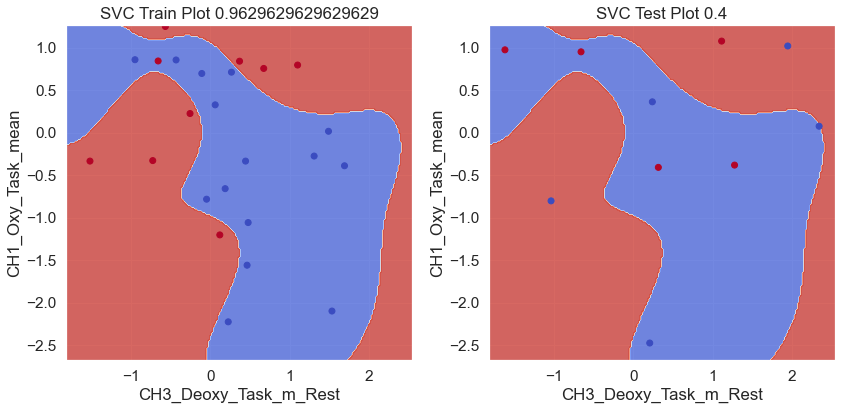

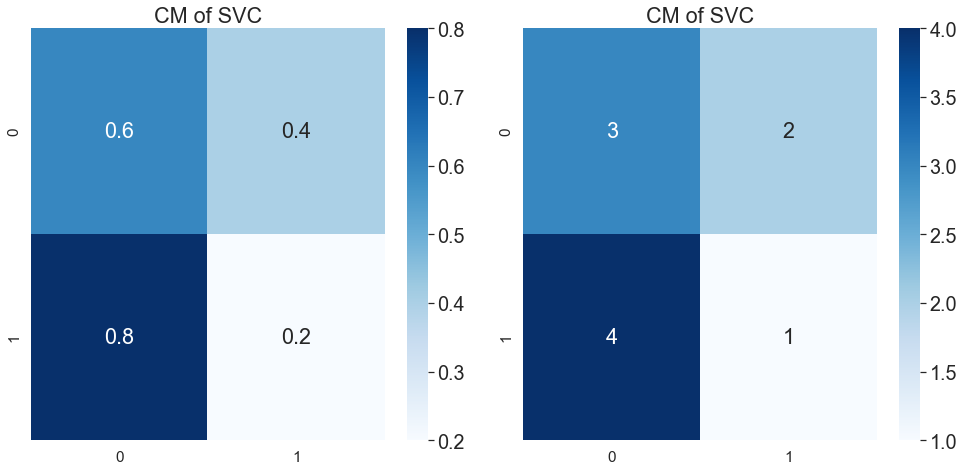

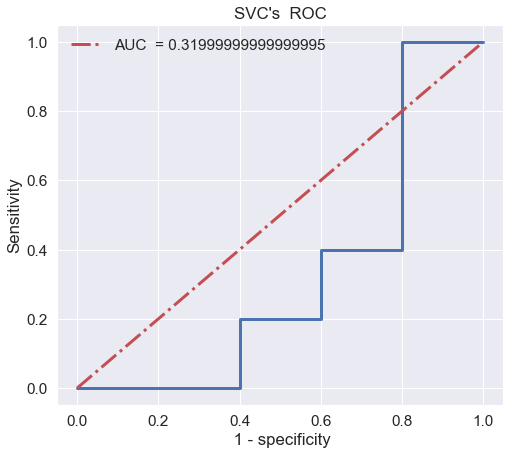

In [24]:
# CBI 1 
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_1_label"], random_state= 42)
cbi2 = ttttest(train_feas, train_labels)
train_feas, test_feas = train_feas[cbi2.index[:2]], test_feas[cbi2.index[:2]]


# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print(f'trans {imm}')
# print(test_feas)
# ===================================


csc = SVC(probability=True, gamma= 1, C= 100)                          
csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))
print(cbi2[:2])
print('train ', train_s)
print('test', test_s)
print("param C = ", csc.get_params()["C"], "param gamma = ", csc.get_params()["gamma"])

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound = 0.2)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 0)

CH2_Oxy_recovery_skew       0.015569
CH3_Oxy_stage_activation    0.053297
Name: CBI_2_label_T_score, dtype: float64
train  0.9629629629629629
test 0.5
param: C =  100 , param: gamma =  1


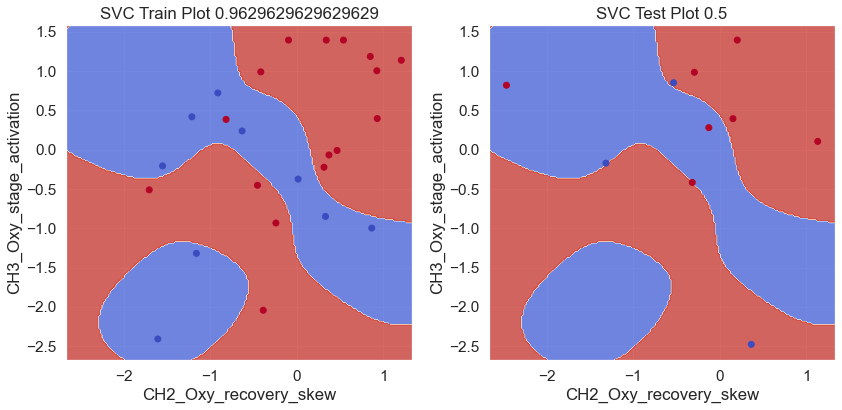

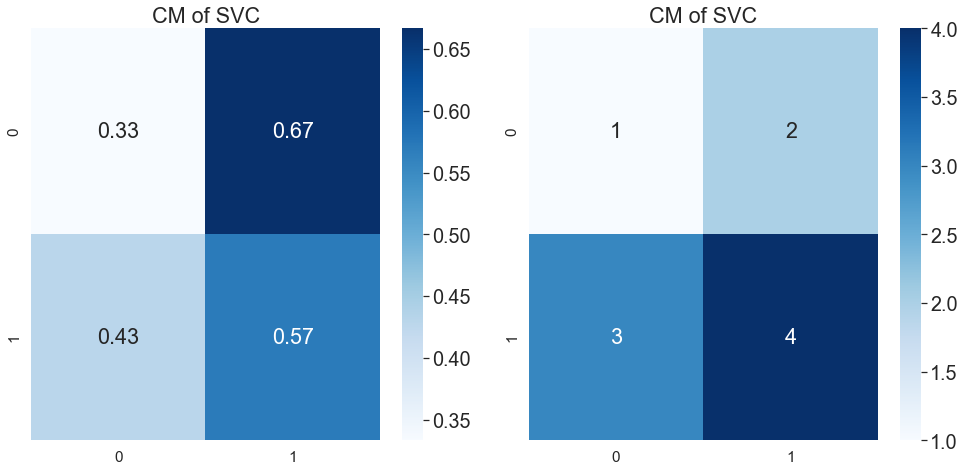

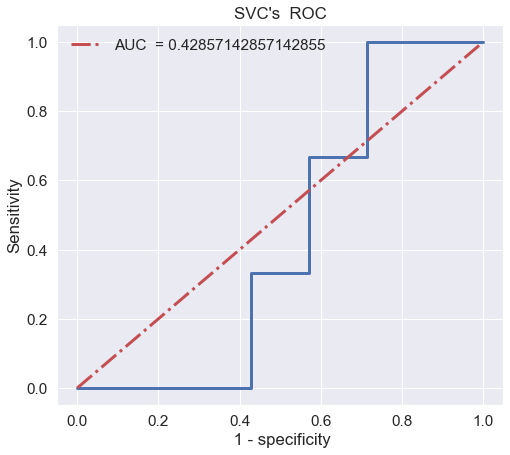

In [25]:
# CBI 2 
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_2_label"], random_state= 42)
cbi2 = ttttest(train_feas, train_labels)
train_feas, test_feas = train_feas[cbi2.index[:2]], test_feas[cbi2.index[:2]]

# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print(f'trans {imm}')
# print(test_feas)
# ===================================


csc = SVC(probability=True, gamma= 1, C= 100)                          
csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))
print(cbi2[:2])
print('train ', train_s)
print('test', test_s)
print("param: C = ", csc.get_params()["C"], ", param: gamma = ", csc.get_params()["gamma"])

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound = 0.2)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 1)

CH3_Oxy_task_skew    0.002397
CH3_Oxy_Task_std     0.006376
Name: D score_label_T_score, dtype: float64
train  0.9259259259259259
test 0.6
param C =  100 param gamma =  1


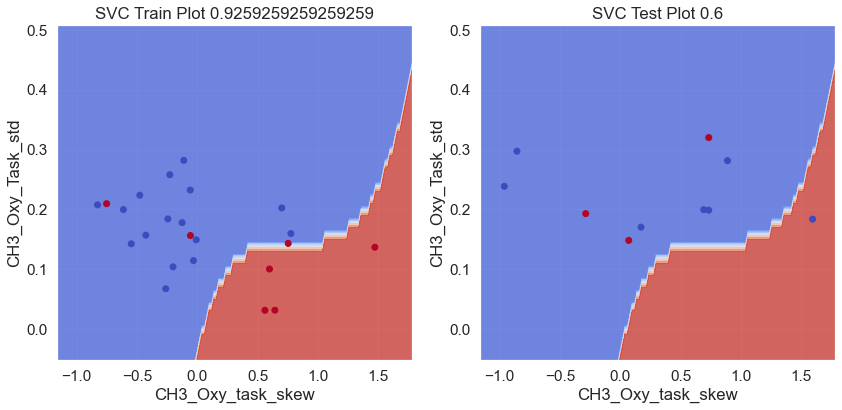

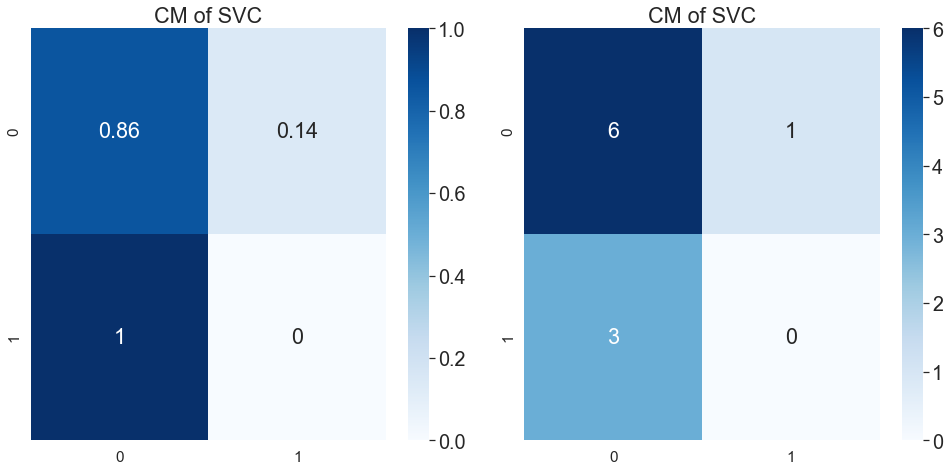

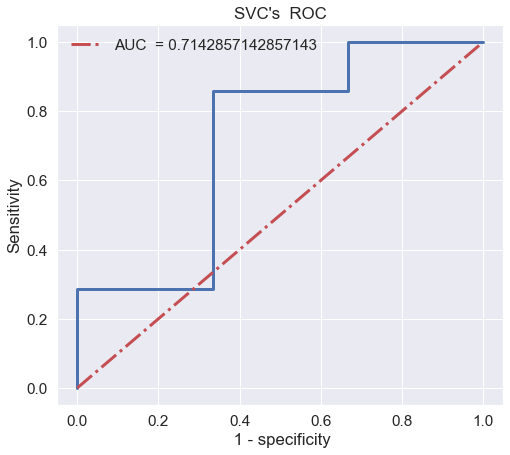

In [26]:
# "D score_label" 
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["D score_label"], random_state= 42)
cbi2 = ttttest(train_feas, train_labels)
train_feas, test_feas = train_feas[cbi2.index[:2]], test_feas[cbi2.index[:2]]

# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 1, C= 100)                          
csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))
print(cbi2[:2])
print('train ', train_s)
print('test', test_s)
print("param C = ", csc.get_params()["C"], "param gamma = ", csc.get_params()["gamma"])

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.2)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 1)

CH1_Deoxy_Rest_std    0.000426
CH2_Oxy_Task_std      0.004334
Name: A score_label_T_score, dtype: float64
train  0.5555555555555556
test 0.5
param C =  1 param gamma =  1


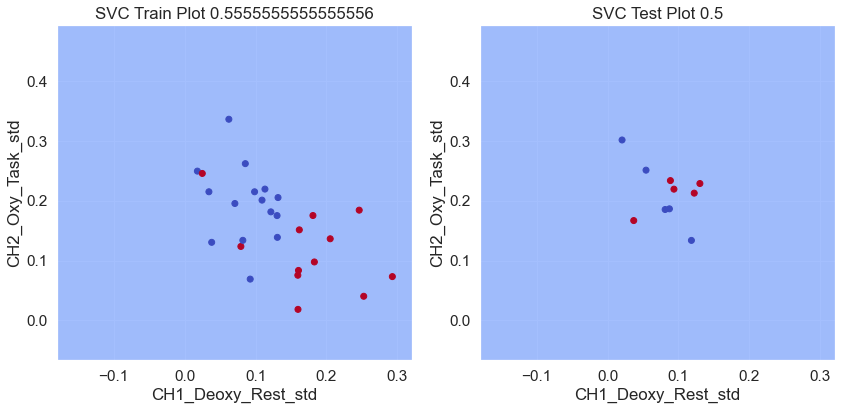

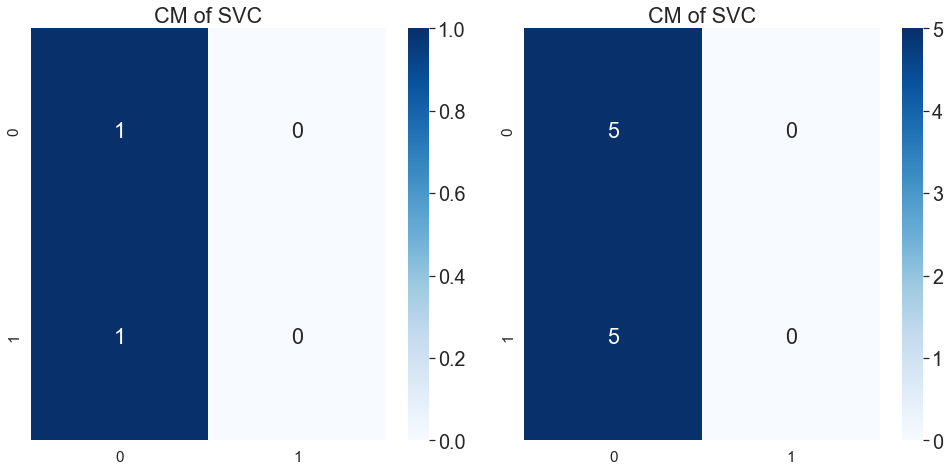

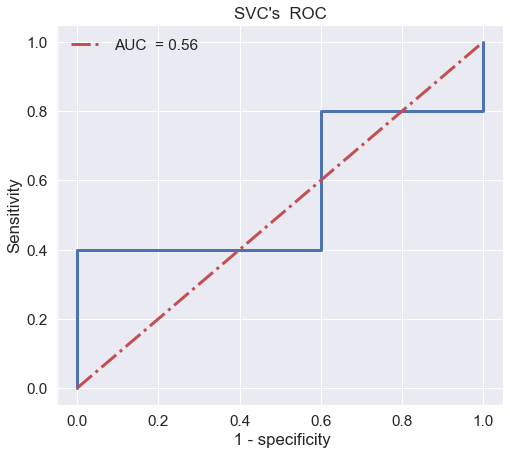

In [27]:
# "A score_label" 
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["A score_label"], random_state= 42)
cbi2 = ttttest(train_feas, train_labels)
train_feas, test_feas = train_feas[cbi2.index[:2]], test_feas[cbi2.index[:2]]

# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 1, C= 1)                          
csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))
print(cbi2[:2])
print('train ', train_s)
print('test', test_s)
print("param C = ", csc.get_params()["C"], "param gamma = ", csc.get_params()["gamma"])

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.2)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 0)

## 2. 樹的feature important + SVC + plot

In [33]:
from sklearn.ensemble import RandomForestClassifier

### Model 測試結果

train  0.7407407407407407
test 0.6


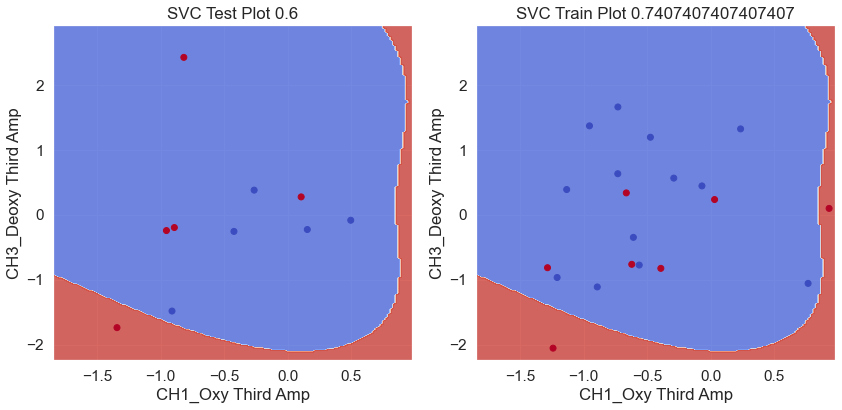

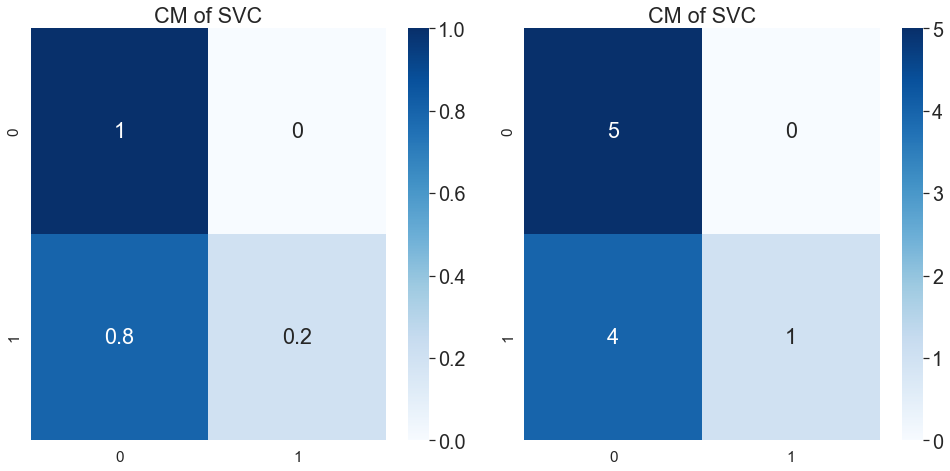

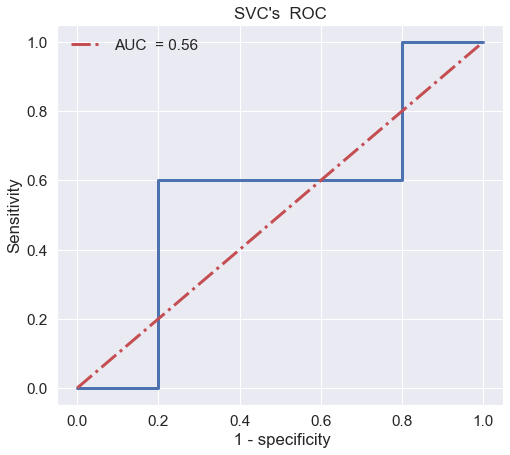

In [40]:
# CBI1
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_1_label"], random_state= 42)

train_feas = train_feas.drop(columns = "Name")
test_feas = test_feas.drop(columns = "Name")

# print(train_feas.columns.shape)

coll = train_feas.columns

rfc = RandomForestClassifier(random_state= 42)
rfc.fit(train_feas, train_labels)
    
imp = rfc.feature_importances_

Se = pd.Series(imp, index= coll).sort_values(ascending= False)

train_feas, test_feas = train_feas[Se.index[:2]], test_feas[Se.index[:2]]

# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print('go')
        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 0.1, C= 100)                          


csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))

print('train ', train_s)
print('test', test_s)
# print("par = ", par)

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.5)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 1)


train  0.8518518518518519
test 0.4


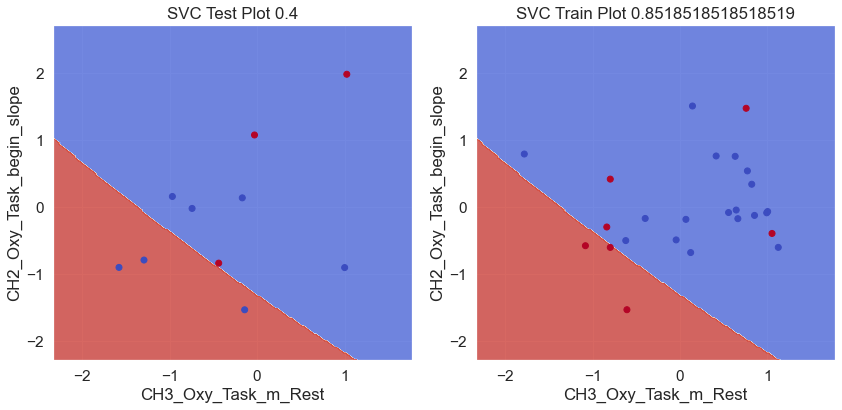

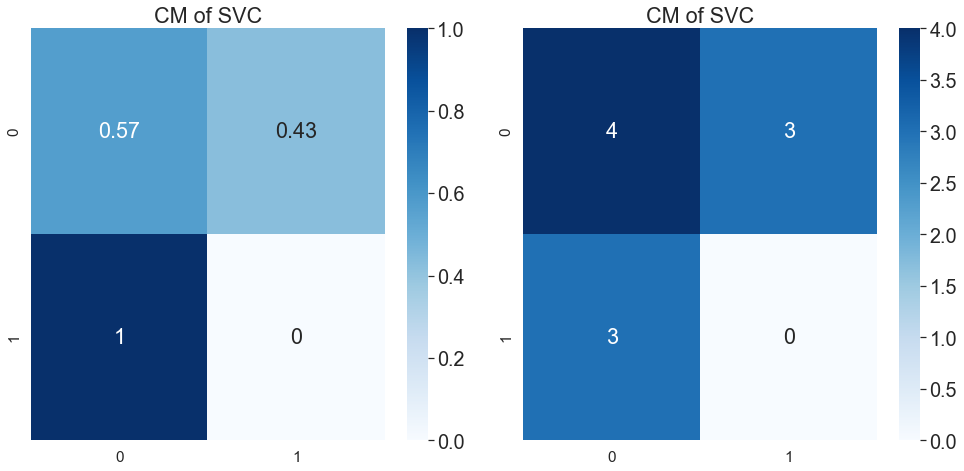

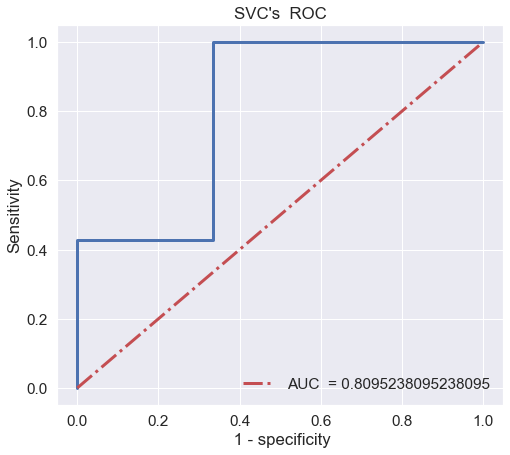

In [42]:
# D score_label
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["D score_label"], random_state= 42)
train_feas = train_feas.drop(columns = "Name")
test_feas = test_feas.drop(columns = "Name")

# print(train_feas.columns.shape)

coll = train_feas.columns

rfc = RandomForestClassifier(random_state= 42)
rfc.fit(train_feas, train_labels)
    
imp = rfc.feature_importances_

Se = pd.Series(imp, index= coll).sort_values(ascending= False)

train_feas, test_feas = train_feas[Se.index[:2]], test_feas[Se.index[:2]]




# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print('go')
        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 0.01, C= 100)                          


csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))

print('train ', train_s)
print('test', test_s)
# print("par = ", par)

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.75)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 1)

train  0.8518518518518519
test 0.6


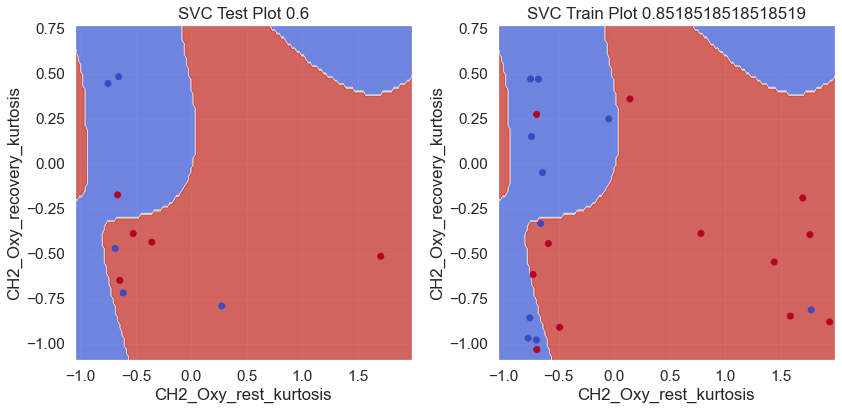

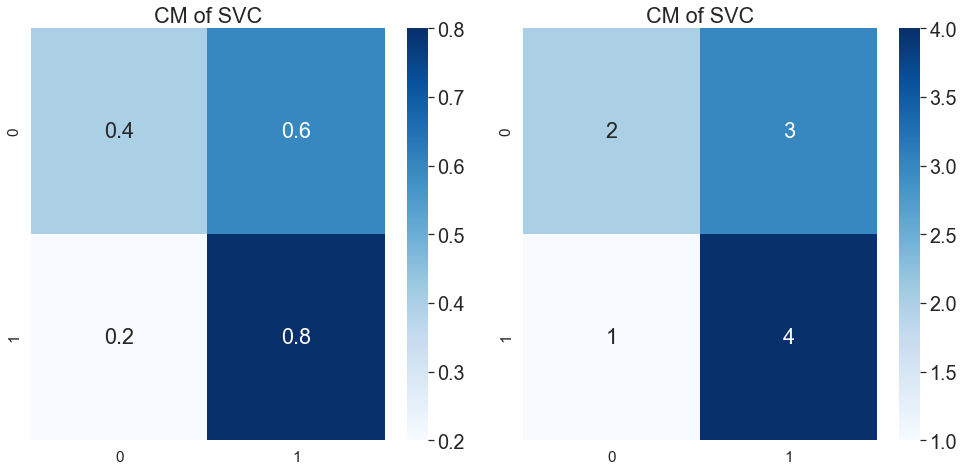

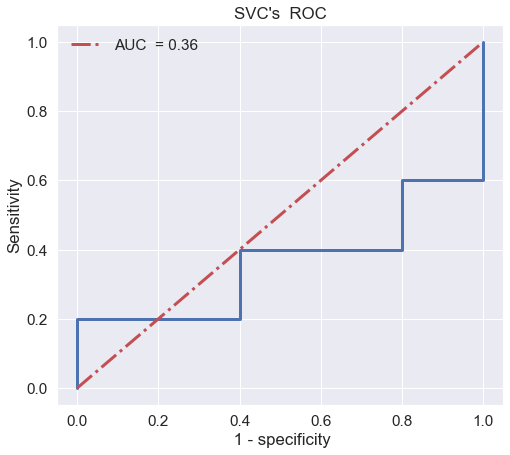

In [46]:
# A score_label
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["A score_label"], random_state= 177)
train_feas = train_feas.drop(columns = "Name")
test_feas = test_feas.drop(columns = "Name")

# print(train_feas.columns.shape)

coll = train_feas.columns

rfc = RandomForestClassifier(random_state= 42)
rfc.fit(train_feas, train_labels)
    
imp = rfc.feature_importances_

Se = pd.Series(imp, index= coll).sort_values(ascending= False)

train_feas, test_feas = train_feas[Se.index[:2]], test_feas[Se.index[:2]]

# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print('go')
        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 1, C= 100)                          


csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))

print('train ', train_s)
print('test', test_s)
# print("par = ", par)

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.3)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 0)

train  1.0
test 0.4


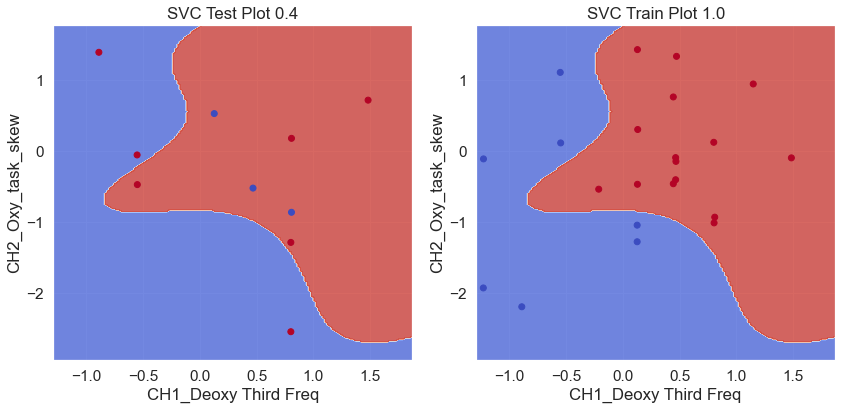

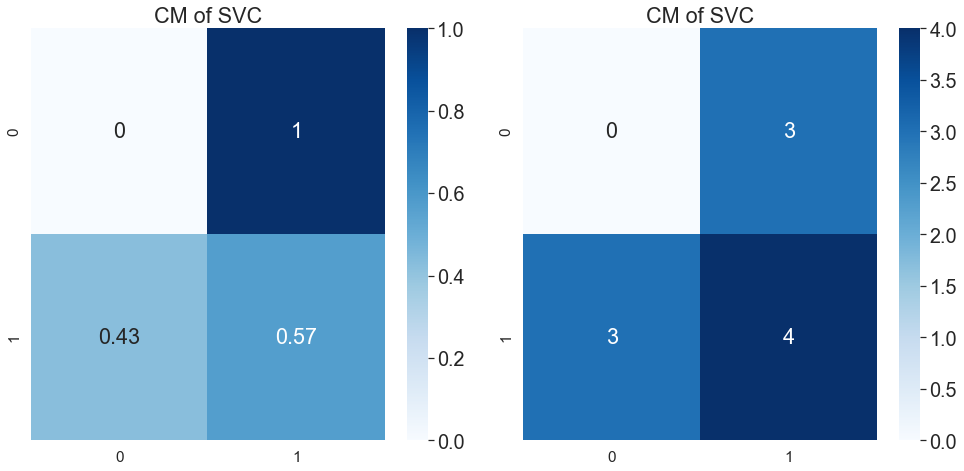

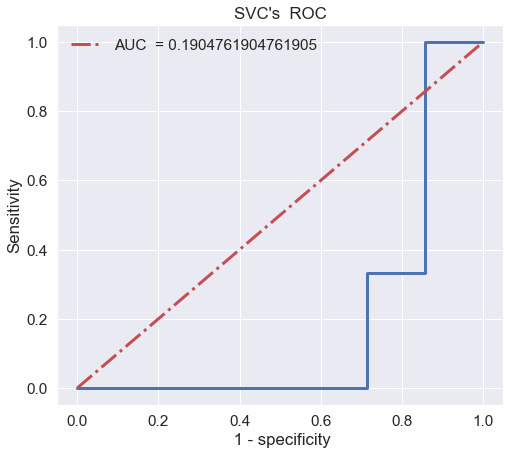

In [44]:
# CBI_2_label
train_feas, train_labels, test_feas, test_labels = Starifieds(df_feature_cl, pure_feature["CBI_2_label"], random_state= 42)
train_feas = train_feas.drop(columns = "Name")
test_feas = test_feas.drop(columns = "Name")

# print(train_feas.columns.shape)

coll = train_feas.columns

rfc = RandomForestClassifier(random_state= 42)
rfc.fit(train_feas, train_labels)
    
imp = rfc.feature_importances_

Se = pd.Series(imp, index= coll).sort_values(ascending= False)

train_feas, test_feas = train_feas[Se.index[:2]], test_feas[Se.index[:2]]


# ====================
# print(train_feas.columns)
for imm in train_feas.columns:
    if 'std' not in imm:     
        sd = StandardScaler()
        train_feasn = sd.fit_transform(train_feas[imm].values.reshape(-1,1))
        test_feasn = sd.transform(test_feas[imm].values.reshape(-1,1))

        train_feas[imm] = train_feasn
        test_feas[imm] = test_feasn

        # print('go')
        # print(f'trans {imm}')
# print(test_feas)
# ===================================

csc = SVC(probability=True, gamma= 1, C= 10)                          


csc.fit(train_feas, train_labels)
train_s = accuracy_score(train_labels, csc.predict(train_feas))
test_s = accuracy_score(test_labels, csc.predict(test_feas))

print('train ', train_s)
print('test', test_s)
# print("par = ", par)

acc_plot(test_feas, test_labels, train_feas, train_labels, csc, bound= 0.4)
condusion_m(test_feas, test_labels, csc)
ROCP(test_feas, test_labels, csc, a= 0)

# 3. RFE + 含 _coef, feature_importance 的model + plot

        * 吃_coef的都是linear
        * 吃feature important的都太高階